 # NBA Social Presence and Performance

 ##### by Alison Chai and Bharvee Patel

In [1]:
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.set_printoptions(threshold=50)

The NBA is an influential organization, and its players are often leaders in social media and following. The NBA creates "celebrities" in a sense, so it is interesting to analyze whether their popularity stems from their performance. The project focuses on using player stats to gain insights about team performance and players' social media engagement.

## 1. **The Data**

Choose and describe a data set that includes at least two tables, some quantitative variable, and some categorical variable.

The dataset, Social Power-NBA, contains data on NBA player stats and social media presence. This data was obtained through Kaggle at https://www.kaggle.com/noahgift/social-power-nba. 


The `rpm` data describes the NBA players' and their games played, minutes per game, offensive real plus minus, defensive real plus minus, real plus minus, numbers of wins. 

https://deadspin.com/just-what-the-hell-is-real-plus-minus-espns-new-nba-s-1560361469

In [2]:
import pandas as pd
rpm = Table.read_table("rpm.csv", sep=",")
rpm

NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.8
"Jimmy Butler, SG",CHI,76,37,4.82,1.8,6.62,17.35
"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84
"Rudy Gobert, C",UTAH,81,33.9,0.35,6.02,6.37,15.55
"James Harden, SG",HOU,81,36.4,6.38,-1.57,4.81,15.54
"Kawhi Leonard, SF",SA,74,33.4,5.83,1.25,7.08,15.53
"Chris Paul, PG",LAC,61,31.5,5.16,2.76,7.92,13.48
"Nikola Jokic, C",DEN,73,27.9,4.44,2.29,6.73,13.18


The variables in `social` include more specific variables including field goals, field goal percetage, page views on Wikipedia, number of times the player favorited a tweet, and number of times the player retweeted. Categorical variables include the player's name and the position played by the player. 

In [3]:
social = Table.read_table("socialmedia.csv", sep=",")
social

Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23,102.31,46,26.5,4279,2130.5,559
1,2,James Harden,PG,27,36.4,8.3,18.9,0.44,3.2,9.3,0.347,5.1,9.6,0.53,0.525,9.2,10.9,0.847,1.2,7,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19,102.98,54,26.5,3279,969,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28,NO,75,36.1,0.45,3.9,4.35,12.81,19.2,100.19,31,22.12,82.5,368,104
3,6,DeMarcus Cousins,C,26,34.2,9,19.9,0.452,1.8,5,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11,4.6,1.4,1.3,3.7,3.9,27,NO/SAC,72,34.2,3.56,0.64,4.2,11.26,17.8,97.11,30,16.96,1625.5,102,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,0.37,6,12.1,0.492,0.516,6.5,7.3,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2,27,POR,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43
5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,0.363,8.3,13.5,0.611,0.594,4.8,7.2,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,CLE,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96,14704,5533.5,1501.5
6,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2,5.2,0.38,6.6,12.5,0.529,0.541,6.3,7.2,0.88,1.1,4.7,5.8,3.5,1.8,0.7,2.1,1.6,25.5,SA,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64,2446.5,2701.5,716.5
7,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10,0.411,4.4,8.3,0.537,0.58,4.1,4.6,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3,2.3,25.3,GS,79,33.4,7.27,0.14,7.41,18.8,15.1,105.08,65,12.11,17570.5,12278,2893
8,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,0.401,6.9,13.6,0.505,0.535,4.1,4.6,0.905,0.7,2.5,3.2,5.8,1.2,0.3,2.5,2.2,25.2,CLE,72,35.1,4.35,-2.3,2.05,8.28,13.5,99.12,47,17.64,4796,1541,695
9,12,Kevin Durant,SF,28,33.4,8.9,16.5,0.537,1.9,5,0.375,7,11.5,0.608,0.594,5.4,6.2,0.875,0.6,7.6,8.3,4.8,1.1,1.6,2.2,1.9,25.1,GS,62,33.4,4.41,1.33,5.74,12.24,18.6,103.71,51,26.5,6288.5,1425.5,366


## Data Manipulation 

In [130]:
#nba player statistic table
stat = Table.read_table("statanba.csv").drop(np.arange(2))
stat

/srv/app/venv/lib/python3.6/site-packages/datascience/tables.py:699: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i not in exclude and c not in exclude])


PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
Russell Westbrook,PG,28,34.6,10.2,24,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23,102.31,46
James Harden,PG,27,36.4,8.3,18.9,0.44,3.2,9.3,0.347,5.1,9.6,0.53,0.525,9.2,10.9,0.847,1.2,7,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19,102.98,54
Isaiah Thomas,PG,27,33.8,9,19.4,0.463,3.2,8.5,0.379,5.8,10.9,0.528,0.546,7.8,8.5,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28,NO,75,36.1,0.45,3.9,4.35,12.81,19.2,100.19,31
DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,0.266,9.3,19.2,0.484,0.477,7.4,8.7,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47
DeMarcus Cousins,C,26,34.2,9,19.9,0.452,1.8,5,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11,4.6,1.4,1.3,3.7,3.9,27,NO/SAC,72,34.2,3.56,0.64,4.2,11.26,17.8,97.11,30
Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,0.37,6,12.1,0.492,0.516,6.5,7.3,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2,27,POR,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38
LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,0.363,8.3,13.5,0.611,0.594,4.8,7.2,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,CLE,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51
Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2,5.2,0.38,6.6,12.5,0.529,0.541,6.3,7.2,0.88,1.1,4.7,5.8,3.5,1.8,0.7,2.1,1.6,25.5,SA,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54
Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10,0.411,4.4,8.3,0.537,0.58,4.1,4.6,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3,2.3,25.3,GS,79,33.4,7.27,0.14,7.41,18.8,15.1,105.08,65


In [131]:
#nba player statistic table with twitter details 
sm = Table.read_table("socialmedianba.csv").drop(np.arange(2)).drop(np.arange(2, 37, 1)).sort("PLAYER", descending = False)
sm

/srv/app/venv/lib/python3.6/site-packages/datascience/tables.py:699: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i not in exclude and c not in exclude])


PLAYER,POSITION,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Aaron Brooks,PG,10,1,3
Aaron Gordon,SF,666,42.5,16
Adreian Payne,PF,166,0,13
Al Horford,C,870,136,71
Al-Farouq Aminu,SF,330.5,33,9
Alec Burks,SG,111,10,15
Alex Len,C,270,10.5,6
Allen Crabbe,SG,193.5,11.5,9
Alonzo Gee,SF,109,nan,nan
Amir Johnson,PF,282,31.5,6


In [132]:
#nba player salary table 
#note: bobby portis is listed twice in this table, possibly because he had a salary raise in the year
salary2 = Table.read_table("salarynba.csv").sort("NAME", descending = False)#.drop("POSITION")
salary2

NAME,POSITION,TEAM,SALARY
Aaron Brooks,PG,Indiana Pacers,2700000
Aaron Gordon,PF,Orlando Magic,4351320
Aaron Harrison,SG,Charlotte Hornets,874636
Abdel Nader,SF,Boston Celtics,1167333
Adreian Payne,PF,Minnesota Timberwolves,2022240
Al Horford,C,Boston Celtics,26540100
Al Jefferson,C,Indiana Pacers,10314532
Al-Farouq Aminu,SF,Portland Trail Blazers,7680965
Alec Burks,SG,Utah Jazz,10154495
Alex Abrines,SG,Oklahoma City Thunder,5994764


In [133]:
all_data = stat.join("PLAYER", salary2, "NAME").join("PLAYER" ,sm, "PLAYER").drop("TEAM", "POSITION_2", "POSITION_3") .relabel("TEAM_2", "TEAM").sort("SALARY", descending = False)
#all_data.where("PLAYER", are.equal_to("Bobby Portis"))
all_data.show(10)

PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,TEAM,SALARY,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0,0.2,0,0.2,0.8,0.273,0.214,0.4,0.7,0.556,0.3,0.8,1.2,0.5,0.4,0.1,0.3,1.1,0.8,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,Denver Nuggets,57672,109,nan,nan
Anthony Brown,SF,24,14.5,1.6,4.5,0.36,0.6,2.5,0.259,1,2.1,0.478,0.43,0,0,nan,0.7,2.3,3,0.7,0.5,0.1,0.5,1.4,3.9,11,14.5,-1.42,-0.34,-1.76,0.08,5.8,94.67,3,Orlando Magic,57672,11,3,3
Jarrett Jack,PG,33,16.5,1,1.5,0.667,0,0.5,0,1,1,1,0.667,1,1,1,0,0,0,2.5,1,0,1.5,2,3,2,16.5,-1.85,0.01,-1.84,0.03,5.1,97.67,1,New Orleans Pelicans,57672,245.5,11.5,7
Andrew Bogut,C,32,21.6,1.4,3,0.469,0,0,0,1.4,3,0.475,0.469,0.1,0.4,0.273,2.1,6,8.1,1.8,0.5,0.9,1.6,3.2,2.9,27,21.6,-4.01,4.34,0.33,1.2,9.2,93.14,8,Cleveland Cavaliers,242224,1435.5,57,4
Lamar Patterson,SG,25,8,0.6,3,0.2,0.2,1.2,0.167,0.4,1.8,0.222,0.233,0.4,0.6,0.667,0.2,1.2,1.4,1.2,0.2,0,0.8,1.2,1.8,5,8,-2.23,0.62,-1.61,0.03,-0.4,93.96,1,Atlanta Hawks,246956,82,4,4
Anthony Bennett,PF,23,11.5,1.7,4,0.413,0.6,2.1,0.271,1.1,1.9,0.568,0.484,1.1,1.6,0.722,1.1,2.3,3.4,0.5,0.2,0.1,0.5,0.8,5,23,11.5,-0.76,-1.29,-2.05,0.19,9.4,104.03,3,Brooklyn Nets,1015696,19,9,10.5
Isaiah Canaan,SG,25,15.2,1.6,4.4,0.364,0.6,2.4,0.266,1,2,0.481,0.436,0.8,0.8,0.909,0.2,1.1,1.3,0.9,0.6,0,0.5,0.9,4.6,39,15.2,-3,-1.12,-4.12,-0.37,5.6,96.46,19,Chicago Bulls,1015696,180.5,24.5,8
Andrew Harrison,PG,22,20.5,1.6,5,0.325,0.6,2.2,0.276,1,2.8,0.363,0.385,2.1,2.7,0.763,0.3,1.6,1.9,2.8,0.7,0.3,1.2,2.7,5.9,72,20.5,-1.2,-0.38,-1.58,1.38,5.3,94.76,38,Memphis Grizzlies,1312611,5,0,17
Chasson Randle,PG,23,11.5,1.5,3.8,0.408,0.6,1.8,0.34,0.9,2,0.471,0.49,1.6,1.7,0.953,0.2,1,1.2,1.3,0.3,0.1,0.7,1.5,5.3,26,11.5,-0.74,-1.36,-2.1,0.2,8.4,98.49,8,New York Knicks,1312611,82,13.5,7
Fred VanVleet,PG,22,7.9,1.1,3,0.351,0.3,0.8,0.379,0.8,2.2,0.341,0.401,0.5,0.6,0.818,0.1,1,1.1,0.9,0.4,0.1,0.4,1,2.9,37,7.9,-2.44,0.83,-1.61,0.28,7.8,97.63,25,Toronto Raptors,1312611,116.5,0,17.5


The above table joins the three tables of data we have for overall game statistics, Twitter social media, and salary by player name. The joined table lets us know that there are 241 players in common among all the tables. We can use the combined data to understand Twitter usage for players that have data recorded for that column. After comparing the previous three tables, the joined tables also allowed us to discover an inconsistency with the data as the joined data total was greater than the number of players in the social media table. By grouping by player name and then using the where function in the original tables, we discovered Bobby Portis is included an additional two times (once in the salary and once in the social media data). This additional data may be due to him receiving a salary increase in the year. 

In [134]:
bobbies = all_data.where("PLAYER", are.equal_to("Bobby Portis"))
bobbies

PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,TEAM,SALARY,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Bobby Portis,PF,21,15.6,2.9,5.9,0.488,0.5,1.5,0.333,2.4,4.4,0.541,0.531,0.6,0.9,0.661,1.2,3.5,4.6,0.5,0.3,0.2,0.6,1.5,6.8,64,15.6,-1.94,-0.5,-2.44,0.43,11,97.38,30,Chicago Bulls,1453680,193,37,73
Bobby Portis,PF,21,15.6,2.9,5.9,0.488,0.5,1.5,0.333,2.4,4.4,0.541,0.531,0.6,0.9,0.661,1.2,3.5,4.6,0.5,0.3,0.2,0.6,1.5,6.8,64,15.6,-1.94,-0.5,-2.44,0.43,11,97.38,30,Chicago Bulls,1516320,193,37,73


Below we have removed Bobby from the data as we do not know which social media data to pair up with his salary data. Since this information will be used in our prediction testing later, we will also leave him out so that it will keep our data more consistent.

In [135]:
cleaned_all_data = all_data.where("PLAYER", are.not_equal_to("Bobby Portis"))
cleaned_all_data.show(5)

PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,TEAM,SALARY,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
Alonzo Gee,SF,29,6.8,0.2,1.1,0.214,0,0.2,0,0.2,0.8,0.273,0.214,0.4,0.7,0.556,0.3,0.8,1.2,0.5,0.4,0.1,0.3,1.1,0.8,13,6.8,-2.11,0.43,-1.68,0.08,0.8,104.33,4,Denver Nuggets,57672,109,nan,nan
Anthony Brown,SF,24,14.5,1.6,4.5,0.36,0.6,2.5,0.259,1,2.1,0.478,0.43,0,0,nan,0.7,2.3,3,0.7,0.5,0.1,0.5,1.4,3.9,11,14.5,-1.42,-0.34,-1.76,0.08,5.8,94.67,3,Orlando Magic,57672,11,3,3
Jarrett Jack,PG,33,16.5,1,1.5,0.667,0,0.5,0,1,1,1,0.667,1,1,1,0,0,0,2.5,1,0,1.5,2,3,2,16.5,-1.85,0.01,-1.84,0.03,5.1,97.67,1,New Orleans Pelicans,57672,245.5,11.5,7
Andrew Bogut,C,32,21.6,1.4,3,0.469,0,0,0,1.4,3,0.475,0.469,0.1,0.4,0.273,2.1,6,8.1,1.8,0.5,0.9,1.6,3.2,2.9,27,21.6,-4.01,4.34,0.33,1.2,9.2,93.14,8,Cleveland Cavaliers,242224,1435.5,57,4
Lamar Patterson,SG,25,8,0.6,3,0.2,0.2,1.2,0.167,0.4,1.8,0.222,0.233,0.4,0.6,0.667,0.2,1.2,1.4,1.2,0.2,0,0.8,1.2,1.8,5,8,-2.23,0.62,-1.61,0.03,-0.4,93.96,1,Atlanta Hawks,246956,82,4,4


## **2. Quantitative Visualization**

It is interesting to develop visualizations about player attributes and compensation. Below is a scatterplot of a player's annual salary against the player's age. 

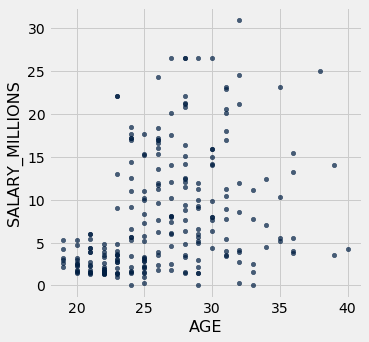

In [4]:
social.scatter('AGE', 'SALARY_MILLIONS')

We can see that there does not seem to be great correlation between the two vairbales, as the data points form a cloud. The exception is for young players, who do not see such variability in their salaries. As a player becomes older, we might infer that salary is determined better by factors other than age. That is, could performance be a better determinant of a player's salary? 

A Below, we plotted RPM (real plus-minus) as a regressor and the salary on the vertical axis. 

**What is a good determinant of player performance?**

We considered several vairables that may be reasonable metrics for player performance. Some of these included average points per game, assists, free throw percentage and field goal percentage. The problem with these variables is that they do not account for a player's position and the time they have on the court. For example, because a point guard normally leads their team in assists and steals, they will likely have a larger number of assists than players of other positions. Let's see if this is true.

We considered several vairables that may be reasonable metrics for player performance. Some of these included average points per game, assists, free throw percentage and field goal percentage. The problem with these variables is that they do not account for a player's position and the time they have on the court. For example, because a point guard normally leads their team in assists and steals, they will likely have a larger number of assists than players of other positions. Let's see if this is true.



In [5]:
social.group('POSITION', np.mean).select('POSITION', 'FG mean', 'STL mean', 'AST mean')

POSITION,FG mean,STL mean,AST mean
C,4.01163,0.637209,1.54884
PF,3.225,0.557692,1.33462
PG,4.258,0.928,4.462
SF,3.9587,0.9,2.06304
SG,3.82083,0.785417,2.07292


As the table shows, point guards have a much larger assist mean than other players and also have larger average STL than other players. Therefore, these metrics are not suitable to compare a player's performance on the field.

Instead a metric, called RPM (real plus-minus), "isolates the unique plus-minus impact of each NBA player by adjusting for the effects of each teammate, opposing player and coach, etc. The RPM model sifts through more than 230,000 possessions each NBA season to tease apart the "real" plus-minus effects attributable to each player, employing techniques similar to those used by scientific researchers when they need to model the effects of numerous variables at the same time. It reflects the impact of each player on his team's scoring margin after controlling for the strength of every teammate and every opponent during each minute he's on the court."

We will use RPM as a better indicator of how well a player is playing when he is on the court. Let us see if there is an association between RPM and players' salaries.

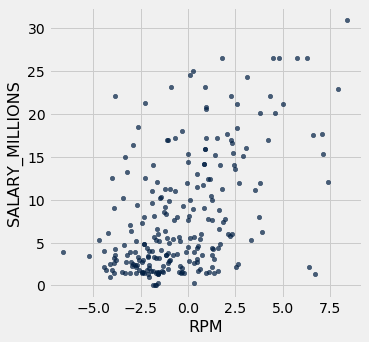

In [6]:
social.scatter('RPM','SALARY_MILLIONS')

In [7]:
social.group('POSITION')

POSITION,count
C,43
PF,52
PG,50
SF,46
SG,48


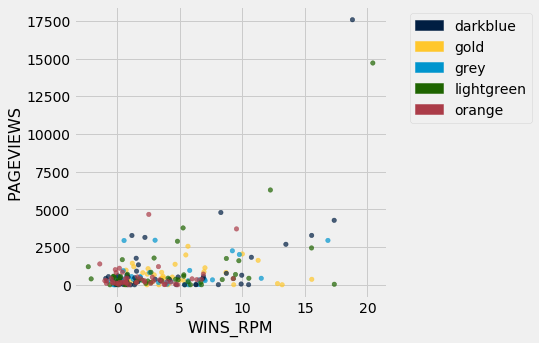

In [8]:
color_table = Table().with_columns(
    'POSITION', make_array('PG', 'C', 'PF', 'SF', 'SG'),
    'Color', make_array('darkblue', 'gold', 'grey', 'lightgreen', 'orange')
)
social = social.join('POSITION', color_table)
social
win_views = social.scatter('WINS_RPM', 'PAGEVIEWS', colors='Color')

As we see, there are two players who have a much larger number of daily page views than other NBA players. Who are they?

In [9]:
social.where('PAGEVIEWS', are.above(12500)).select('PLAYER','PAGEVIEWS','WINS_RPM')

PLAYER,PAGEVIEWS,WINS_RPM
Stephen Curry,17570.5,18.8
LeBron James,14704,20.43


## **3. Qualitative Visualization**
Below we have categorized the cleaned data by team. This allows us to see where most of our players are coming from that also use Twitter. On average it looks like we have about six players per team, with the most being from Oklahoma City Thunder, Denver Nuggets, and Boston Celtics, and the fewest from Dallas Mavericks.

Below we have categorized the cleaned data by team. This allows us to see where most of our players are coming from that also use Twitter. On average it looks like we have about six players per team, with the most being from Oklahoma City Thunder, Denver Nuggets, and Boston Celtics, and the fewest from Dallas Mavericks. 

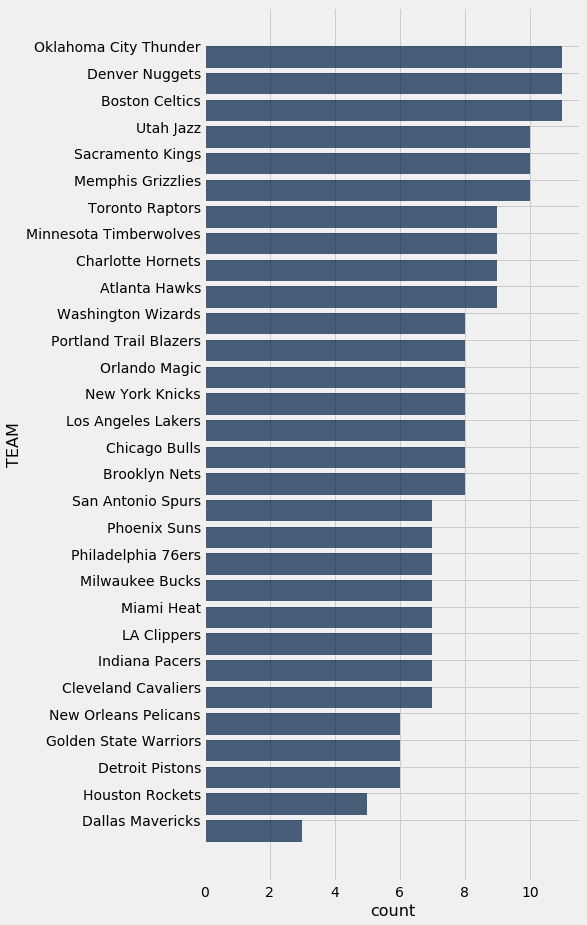

In [136]:
team_category = cleaned_all_data.group("TEAM").sort("count", descending = True)
team_category.barh("TEAM")

Below we have an overlapped graph of player teams and RPM and WINS_RPM means. This allows us to see how successful each team is and which teams are more likely to have successful players. As we can see, teams with more wins, have higher RPMs while teams who have a low WIN_RPM is likely to have a negative RPM value for their players.

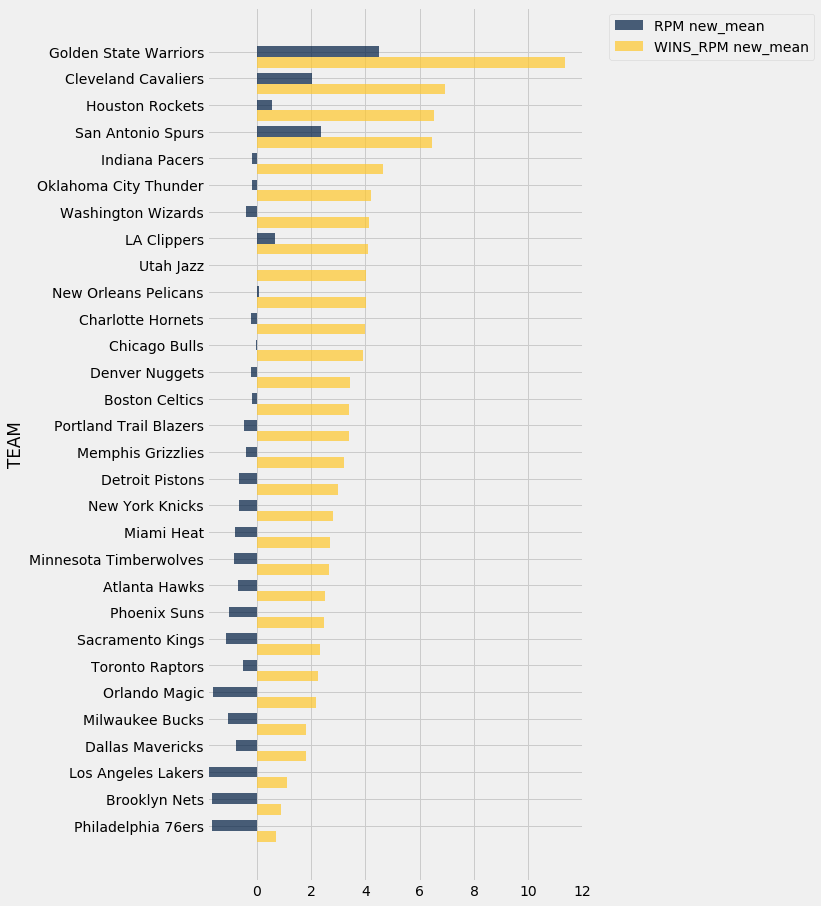

In [139]:
import math
def new_mean(array):
    "Edited np.mean function to account for nans in array"
    new_array = make_array()
    value = 0
    
    length = len(array)
    new_length = len(array)
    for i in np.arange(length):
        if(math.isnan(array.item(i))):
            new_length = new_length - 1
        else:
            value = array.item(i)
            new_array = np.append(new_array, value)
    mean = np.average(new_array)
    return mean
team_game_stats = cleaned_all_data.group("TEAM", new_mean).drop("PLAYER new_mean", "POSITION new_mean").select("TEAM", "RPM new_mean", "WINS_RPM new_mean").sort("WINS_RPM new_mean", descending = True)
team_game_stats.barh("TEAM")

This is a categorical graph showing the mean twitter favorite and and retweet mean among teams. Similar to the RPM team graph, we see a faint connection in the order of teams. Interestingly, the Philadelphia 76ers, which had the lowest WINS_RPM mean, has the third highest Twitter Favorite Count mean. 

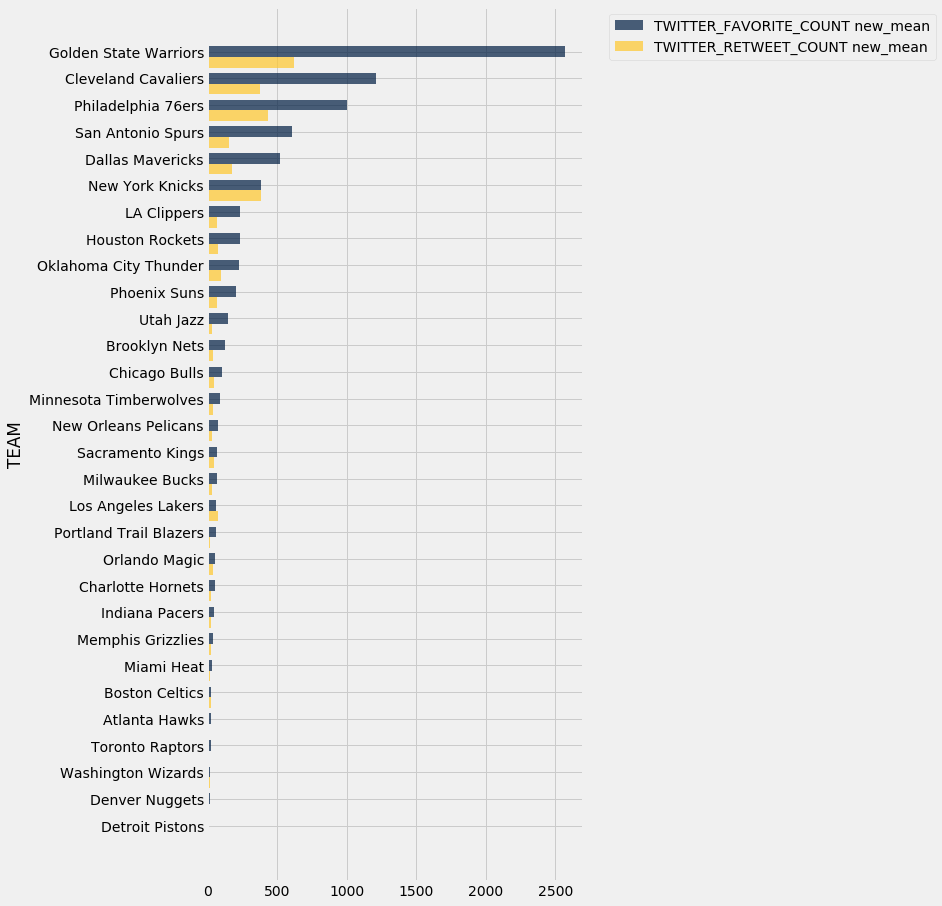

In [140]:
team_sm_stats = cleaned_all_data.group("TEAM", new_mean).drop("PLAYER new_mean", "POSITION new_mean").select("TEAM", "TWITTER_FAVORITE_COUNT new_mean", "TWITTER_RETWEET_COUNT new_mean").sort("TWITTER_FAVORITE_COUNT new_mean", descending = True)
team_sm_stats.barh("TEAM")

We also have a categorical graph displaying the number of different positions the players in the nba have. There appears to be a fairly even distribution of positions. 

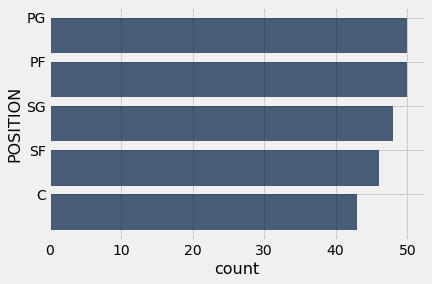

In [141]:
position_category = cleaned_all_data.group("POSITION").sort("count", descending = True)
position_category.barh("POSITION")

Measuring RPM means and RPM_win means with position, we can see there may not be a strong connection between positions and RPM because the bin is so small (within a range of about 5). 

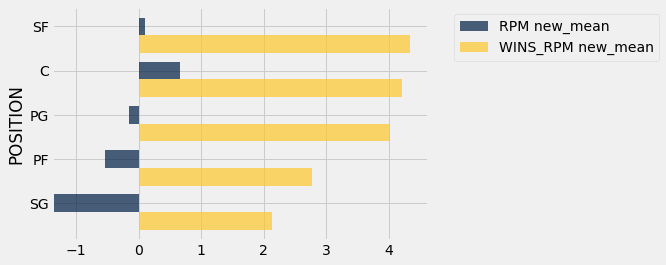

In [143]:
position_game_stats = cleaned_all_data.group("POSITION", new_mean).drop("PLAYER new_mean", "TEAM new_mean").select("POSITION", "RPM new_mean", "WINS_RPM new_mean").sort("WINS_RPM new_mean", descending = True)
position_game_stats.barh("POSITION")Interestingly, we only have Twitter data for point guards and shooting guards. Tehe means of favorites and rewtweets for point guards far exceeds the amount that shooting guards have. 

Interestingly, we only have Twitter data for point guards and shooting guards. Tehe means of favorites and rewtweets for point guards far exceeds the amount that shooting guards have. 

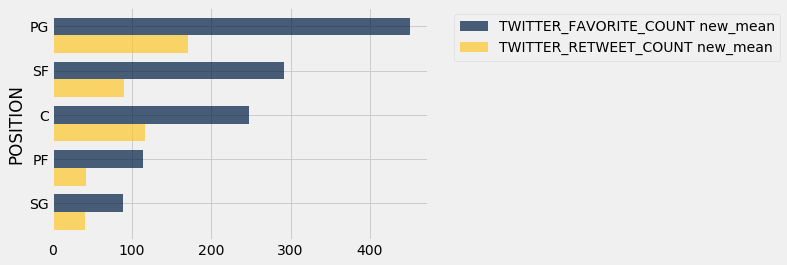

In [145]:
position_sm_stats = cleaned_all_data.group("POSITION", new_mean).drop("PLAYER new_mean", "TEAM new_mean").select("POSITION", "TWITTER_FAVORITE_COUNT new_mean", "TWITTER_RETWEET_COUNT new_mean").sort("TWITTER_FAVORITE_COUNT new_mean", descending = True)
position_sm_stats.barh("POSITION")

## **4. Grouping/ Pivot Tables**

## **4. Grouping/ Pivot Tables**

Let's see how teams rank by performance. If we use RPM as a metric for an individuals performance, a team will a low average RPM will likely do worse than a team with a high average RPM. This can be argued, because one very talented player can nudge the average RPM up and cause average RPM to misrepresent the performance of the team. However, though basketball is a team sport, individual's contributions are still important.

In order to group average RPM by team, we want to have the full team names (for clarity and those who do not know ach teams abbreviation). Further, the current team abbbreviations for some players include two teams based on if they have played for multiple teams. We only want the team they are currently playingon (2016-2017 season) Let's join a few tables: 

In order to group average RPM by team, we want to have the full team names (for clarity and those who do not know ach teams abbreviation). Further, the current team abbbreviations for some players include two teams based on if they have played for multiple teams. We only want the team they are currently playingon (2016-2017 season) Let's join a few tables: 

In [11]:
salary = Table.read_table("salarynba.csv", sep=",")
salary

NAME,POSITION,TEAM,SALARY
LeBron James,SF,Cleveland Cavaliers,30963450
Mike Conley,PG,Memphis Grizzlies,26540100
Al Horford,C,Boston Celtics,26540100
Dirk Nowitzki,PF,Dallas Mavericks,25000000
Carmelo Anthony,SF,New York Knicks,24559380
Damian Lillard,PG,Portland Trail Blazers,24328425
Chris Bosh,PF,Miami Heat,23741060
Dwyane Wade,SG,Chicago Bulls,23200000
Dwight Howard,C,Atlanta Hawks,23180275
Chris Paul,PG,LA Clippers,22868827


Below we have adjusted RPM by multiplying by 1000, so that it is visible in the visualization next to average page views per team. 

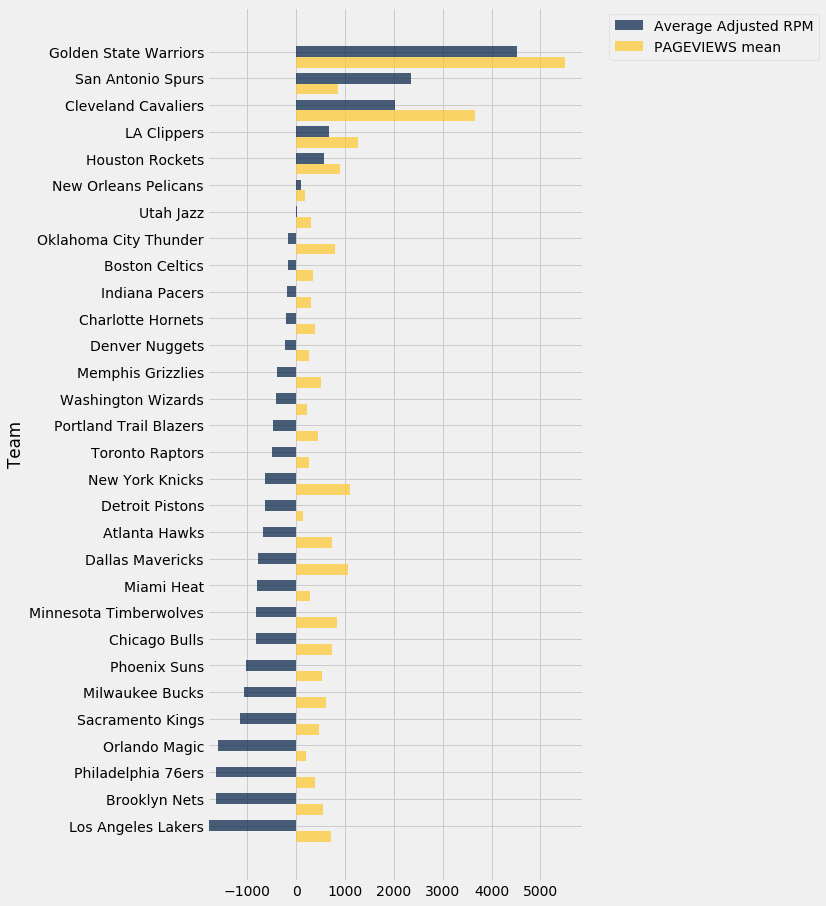

In [12]:
full_teams = social.join('PLAYER',salary, 'NAME')
array_adj_RPM = full_teams.column('RPM')*1000
full_teams2 = full_teams.with_column('Adjusted RPM',array_adj_RPM)
full_teams2.group('TEAM_2', np.mean).select('TEAM_2','Adjusted RPM mean','PAGEVIEWS mean').relabeled('TEAM_2', 'Team').relabeled('Adjusted RPM mean','Average Adjusted RPM').sort('Average Adjusted RPM', descending = True).barh('Team')

It looks like teams that perform better are more popular in terms of page views on Wikipedia! We didn't expect this for the Lakers, since the Lakers brand is quite popular despite the team's low performance.

## **Player Performance and RPM: Is there an association?**

## **Player Performance and RPM: Is there an association?**

The previous visualizations have interested us in understanding whether player performance has an effect on social media presence. 

**Our question:** Are players that are objectively "better" at basketball more likely to engage on social media, particularly Twitter?

1. **Sample:** 2016-2017 NBA basketball players
2. **Population:** All professional basketball players
3. **Metrics:** Social Media Engagement (sum of # of favorites and # of retweets made by player in given year), Player Performance (RPM)

## **6. Hypothesis Testing**
**Null Hypothesis:** There is no correlation between player's performance on social media engagement. (slope of the true line =0)

**Alternative Hypothesis:** There is some correlation between a player's performance on social media engagement. (slope of the true line does not equal 0)


In [13]:
engagement = Table().with_columns('Player', social.column('PLAYER'),
                                  'RPM',social.column('RPM'),
                                  'Social Engagement', social.column('TWITTER_FAVORITE_COUNT')+social.column('TWITTER_RETWEET_COUNT'))
df = {'RPM': social.column('RPM'), 'Social Engagement': social.column('TWITTER_FAVORITE_COUNT')+social.column('TWITTER_RETWEET_COUNT') }
engagementdf = pd.DataFrame(data=df)
engagement = engagementdf.fillna(0)
engagement = Table.from_df(engagement)
engagement


RPM,Social Engagement
4.35,472
4.2,193.5
2.13,105
1.7,9793.5
2.58,75.5
6.73,1
0.77,41
2.66,84
-0.68,342
6.37,956.5


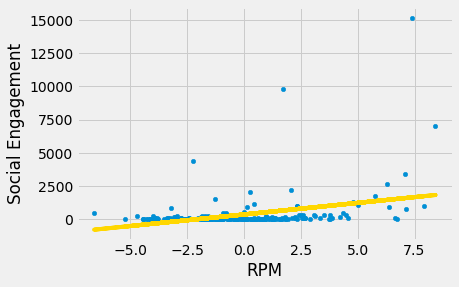

In [14]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    plots.scatter(table.column(x), table.column(y), s=20)
    plots.plot(table.column(x), fit(table, x, y), color='gold')
    plots.xlabel(x)
    plots.ylabel(y)
    
scatter_fit(engagement, 'RPM', 'Social Engagement')

In [15]:
correlation(engagement, 'RPM', 'Social Engagement')

0.34806737944897265

In [16]:
slope(engagement, 'RPM', 'Social Engagement')

173.68813385028059

## **7. Statistical Test**
#### Bootstrapping (Estimating the True Slope)

In [17]:
def bootstrap_slope(table, x, y, repetitions):

    # For each repetition:
    # Bootstrap the scatter, get the slope of the regression line,
    # augment the list of generated slopes
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = table.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)

    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)

    # Slope of the regression line from the original sample
    observed_slope = slope(table, x, y)

    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', observed_slope)
    print('Approximate 95%-confidence interval for the true slope:')
    print(left, right)

Slope of regression line: 173.68813385
Approximate 95%-confidence interval for the true slope:
56.3540066632 325.556706746


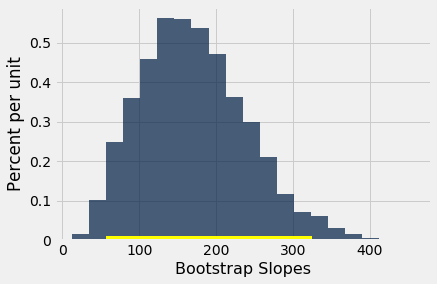

In [18]:
bootstrap_slope(engagement, 'RPM', 'Social Engagement', 5000)

Because the confidence interval does not contain 0, we reject the null hypothesis that the true slope is 0 and conclude that there is an association between RPM and Social Media Engagement at 5% significance. 

## **8. Prediction: Can we predict a player's position based on his stats?**

In [116]:
#split data into train and test
cleaned_social = social.drop(1,2,'PLAYER','AGE','TEAM','Color','PACE','PAGEVIEWS','TWITTER_FAVORITE_COUNT','TWITTER_RETWEET_COUNT', 'W')
shuffled_social = cleaned_social.sample(with_replacement=False) 
training_set = shuffled_social.take(np.arange(89))
test_set  = shuffled_social.take(np.arange(89, 178))
test_set

POSITION,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,SALARY_MILLIONS
SG,23,4,9.4,0.426,1.8,4.6,0.391,2.2,4.7,0.461,0.523,0.8,0.9,0.842,0.4,2.9,3.3,1.5,0.5,0.1,1.2,1.4,10.6,82,23,-0.92,-2.28,-3.2,-0.09,8.4,3.52
C,15.7,3,6.7,0.445,1.3,3.4,0.372,1.7,3.3,0.52,0.539,1.5,1.7,0.876,1.1,3.5,4.5,0.8,0.3,0.5,0.8,2.8,8.7,82,15.7,0.67,0.69,1.36,3.66,11.4,1.4
PG,12.3,2,4.5,0.455,0.5,1.2,0.443,1.5,3.2,0.459,0.516,0.4,0.5,0.759,0.1,0.7,0.8,1.8,0.2,0.1,0.8,0.9,5,57,12.3,-2.15,-3.09,-5.24,-0.92,8.1,3.39
SG,37.2,6.9,15.1,0.459,2.6,6.6,0.387,4.4,8.5,0.515,0.544,2.5,3,0.836,0.4,3,3.4,3,0.9,0.2,1.8,2.2,18.9,47,37.2,-0.62,-2.35,-2.97,0.17,9.5,2.24
PG,12.9,1.3,3,0.414,0.4,1.2,0.356,0.8,1.8,0.454,0.486,0.6,0.7,0.767,0.2,1,1.1,2.6,0.8,0.1,0.6,0.8,3.5,60,12.9,0.11,-0.34,-0.23,1.4,9.6,1.47
PG,18.6,2.3,5.5,0.427,0.7,2.3,0.295,1.7,3.2,0.519,0.488,0.9,1.1,0.795,0.5,1.5,2,1.7,0.3,0.2,1.2,2.2,6.2,66,18.6,-2.14,-0.65,-2.79,0.25,5.4,3.94
SF,21.7,3,6.7,0.45,1,3.2,0.321,2,3.4,0.571,0.528,1.2,1.6,0.72,0.4,2.9,3.3,1.9,0.9,0.1,1,1.6,8.2,57,21.7,-0.46,-0.84,-1.3,1.53,8.6,1.56
SF,14.5,1.6,4.5,0.36,0.6,2.5,0.259,1,2.1,0.478,0.43,0,0,nan,0.7,2.3,3,0.7,0.5,0.1,0.5,1.4,3.9,11,14.5,-1.42,-0.34,-1.76,0.08,5.8,0.06
C,28.8,6.4,13.7,0.468,0.3,1,0.307,6.1,12.7,0.481,0.48,1.4,2.1,0.669,2.3,8,10.4,2.8,1,1,1.6,2.4,14.6,75,28.8,-1.38,2.15,0.77,5.44,14.2,11.75
SG,34.9,8.3,17.2,0.482,2.9,7.2,0.404,5.4,10,0.538,0.566,3.7,4.4,0.825,0.7,2.4,3.1,3.5,1.1,0.3,2,2.2,23.1,77,34.9,3.29,-1.04,2.25,9.26,11.9,22.12


In [117]:
#implementing classifier
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('POSITION')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [118]:
#gets the majority 
def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    max_position = closestk.group('POSITION').sort('count',descending = True).column('POSITION').item(0)
    return max_position

In [119]:
classify(test_set, cleaned_social.drop('POSITION').row(31), 10)

'C'

In [120]:
#proportion correct 
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return array1 == array2

def evaluate_accuracy(training, test, k):
    test_attributes = test_set.drop('POSITION')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    print(c)
    return np.count_nonzero(count_equal(c, test.column('POSITION')))/test.num_rows

In [121]:
evaluate_accuracy(training_set, test_set, 8)

['SF' 'SF' 'PF' ..., 'SF' 'SG' 'PF']


0.3146067415730337